In [3]:
# Importing some python libraries.
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline
# Fixing figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

import sympy as sp

pale_red = sns.xkcd_rgb['pale red']    
denim_blue = sns.xkcd_rgb['denim blue']

# Overdamped Langevin Equation

The overdamped Langevin equation is defined as

$$
dX_t=-\nabla U(x)dt+\sigma dB_t,
$$
for some potential $U$. $B_t$ represents Brownian motion and $\sigma$ controls the "strength" of the random variations. 

In this example, we will work with a specific potential 

$$
U(x)=(b-a/2)(x^2-1)^2+a/2\cdot (x+1).
$$

This is a double-well potential, as can be seen in the following plot.

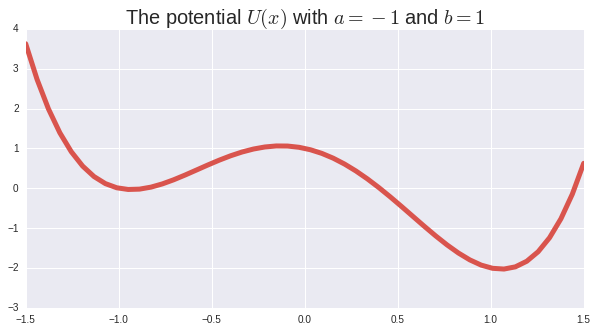

In [44]:
a = -1;
b = 1;

def U(x,a=-1,b=1):
    return (b-a/2)*(x**2-1)**2+a/2*(x+1)

x = np.linspace(-1.5,1.5)
pl.plot(x,U(x),color=pale_red,linewidth=5)
pl.title('The potential $U(x)$ with $a=-1$ and $b=1$',fontsize=20)

## Deterministic System

Let's write the equation down, given the specific potential. First, if $\sigma=0$,then the equation is an ODE

$$
\begin{align}
\frac{dX_t}{dt}&=4c(1-x^2)x-a/2,\\c&=(b-a/2).
\end{align}
$$

In [7]:
# Defining the derivative of the potential
def Uprime(x,t,a=-1,b=1):
    return 4*(b-a/2.0)*x*(1-x**2)-a/2.0

By numerically solving $U'(x)=0$, we can find that there are three equilibrium points for the system. Approximately, those are 

$$
\begin{align}
x_1&=-0.955393,\\
x_2&=-0.083924,\\
x_3&=1.03932.
\end{align}
$$

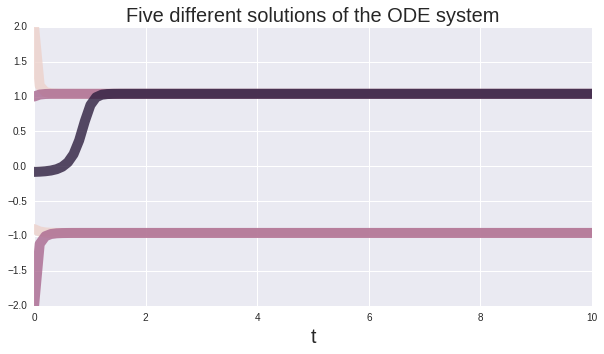

In [36]:
from scipy.integrate import odeint # importing a solver

t   = np.linspace(0,10,100)

xinit = np.array([2.0,1.0,-0.08,-0.9,-2])

with sns.cubehelix_palette(3):
    for i in xrange(5):
        sol = odeint(Uprime, xinit[i], t)
        pl.plot(t,sol,alpha=0.8,linewidth=10)
    
pl.title('Five different solutions of the ODE system',fontsize=20)
pl.xlabel('t',fontsize=20)

As we can see, out of the three equilibrium solutions of the system, the two are stable and the one in the middle is unstable. We will use this information for comparisons with the stochastic system.

# Stochastic System

Let us now assume that $\sigma>0$. In that case, we have an SDE, which we can solve with Euler-Maruyama. The scheme shall be : 

$$
X_{n+1}=X_{n}+f(X_n)\Delta t+\sigma \sqrt{\Delta t}\cdot z,
$$

where $z$ is a standard normal distribution.

In [13]:
def EM(xinit,sigma,T,Dt=0.1,a=-1,b=1):
    '''
        Returns the solution of the Langevin equation with 
        potential U. 
        
        Arguments
        =========
        xinit : real, initial condition.
        sigma : real, standard deviation parameter, used in generating brownian motion.
        Dt    : real, stepsize of the Euler-Maruyama.
        T     : real, final time to reach.
    
    '''
    
    n = int(T/Dt) # number of steps to reach T
    X = np.zeros(n)
    z = sigma*randn(n)
    
    X[0] = xinit # Initial condition
    
    # EM method 
    for i in xrange(1,n):
        X[i] = X[i-1] + Dt* Uprime(X[i-1],a,b) + np.sqrt(Dt)*z[i-1]
        
    return X
        

Now we can reproduce the picture from the deterministic case, but this time with the extra stochastic part. When $\sigma$ is small, we see a similar picture with previously as the deterministic dynamics overpower the stochasticity.

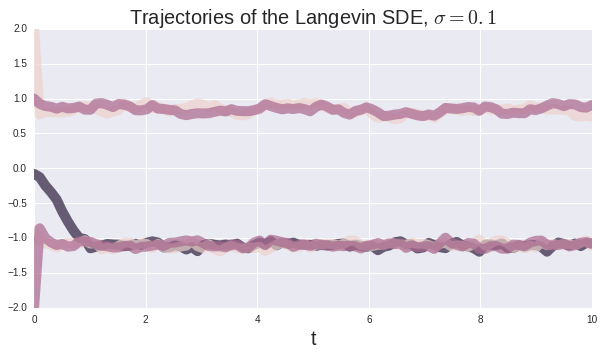

In [35]:
with sns.cubehelix_palette(3):
    for i in xrange(5):
        path = EM(xinit[i],sigma=0.1,T=10)
        pl.plot(t,path,alpha=0.7,linewidth=10)

pl.title('Trajectories of the Langevin SDE, $\sigma=0.1$',fontsize=20)
pl.xlabel('t',fontsize=20)

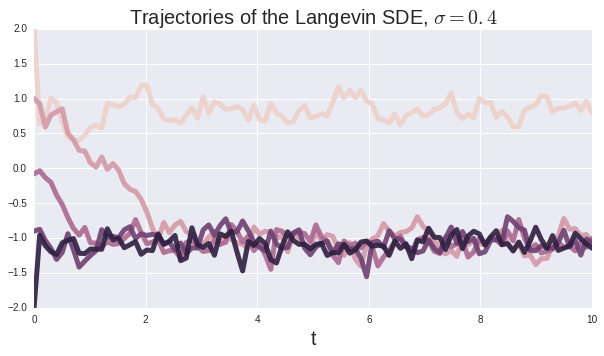

In [37]:
with sns.cubehelix_palette(5):
    for i in xrange(5):
        path = EM(xinit[i],sigma=0.4,T=10)
        pl.plot(t,path,alpha=0.9,linewidth=5)

pl.title('Trajectories of the Langevin SDE, $\sigma=0.4$',fontsize=20)
pl.xlabel('t',fontsize=20)

Changing the $\sigma$ from $0.1$ to $0.4$ provides random "kicks" that are hard enough for the solutions to jump from one equilibrium to the other.

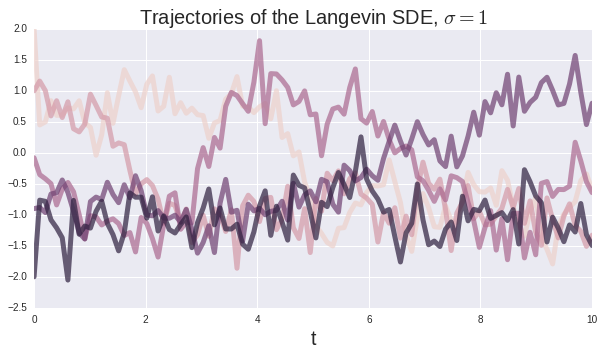

In [38]:
with sns.cubehelix_palette(5):
    for i in xrange(5):
        path = EM(xinit[i],sigma=1,T=10)
        pl.plot(t,path,alpha=0.7,linewidth=5)

pl.title('Trajectories of the Langevin SDE, $\sigma=1$',fontsize=20)
pl.xlabel('t',fontsize=20)



With $\sigma=1$, the trajectories can now move freely between the equilibrium points. We can still see some kind of attraction though to the area around them.

![From XKCD](https://what-if.xkcd.com/imgs/a/13/laser_pointer_more_power.png)

Let us attempt to set $\sigma$ to a larger number and see what happens.

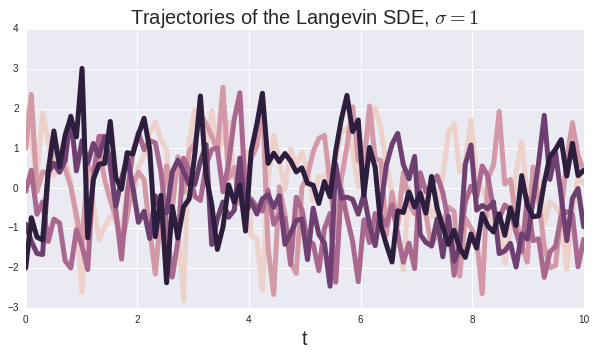

In [41]:
with sns.cubehelix_palette(5):
    for i in xrange(5):
        path = EM(xinit[i],sigma=2.4,T=10)
        pl.plot(t,path,linewidth=5)

pl.title('Trajectories of the Langevin SDE, $\sigma=1$',fontsize=20)
pl.xlabel('t',fontsize=20)

Now the kicks are strong enough that the attractiveness (or repulsiveness) of the stationary points looks completely irrelevant. The dynamics are all about the stochastic part.

## Changing the properties of the potential

We now fix $\sigma=1$ and look at the paths for $a\in [0,b]$. We will start from $X_0=1.3$.



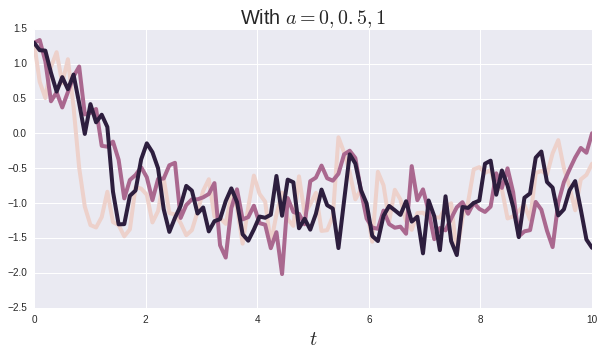

In [69]:
b = 1
arange = np.linspace(0,b,3)


with sns.cubehelix_palette(3):
    for aval in arange: 
        path = EM(1.3,sigma=1, T=10, a=aval)
        pl.plot(t,path,linewidth=4)
        
pl.title('With $a=0,0.5,1$',fontsize=20)
pl.xlabel('$t$',fontsize=20)

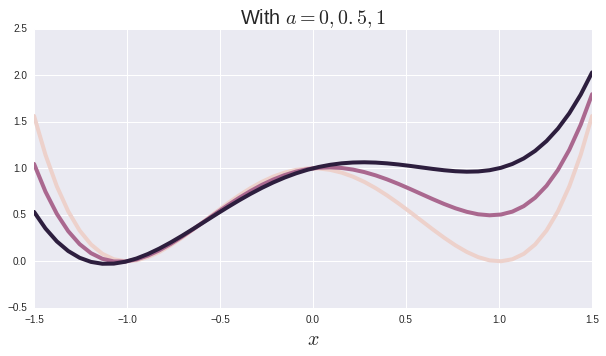

In [62]:
b = 1
arange = np.linspace(0,b,3)


with sns.cubehelix_palette(3):
    for aval in arange: 
        pl.plot(x,U(x,a=aval),linewidth=4)
        
pl.title('With $a=0,0.5,1$',fontsize=20)
pl.xlabel('$x$',fontsize=20)

Above we have the potentials corresponding to the paths. To make things more concrete, here is the path superimposed on the potential.

In [117]:
def plotOnPoten(a,T=2):
    x = np.linspace(-2,2)
    pl.plot(x,U(x,a=0.5),linewidth=1,color='black')
    path = EM(1.3,sigma=1, T=T, a=aval)

    pl.plot(path,U(path,a=0.5),linewidth=4,alpha=0.7,color=pale_red)
    pl.title('For $a='+str(a)+'$.',fontsize=20)

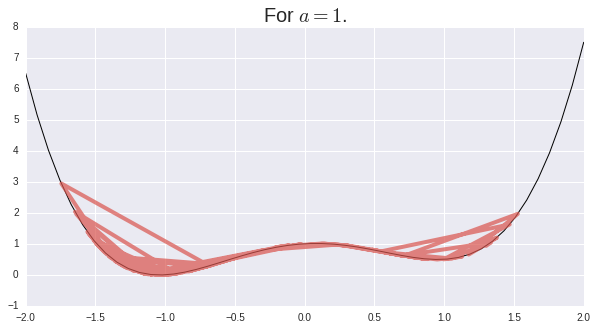

In [118]:
plotOnPoten(1,T=10)